<a href="https://colab.research.google.com/github/raj-abhishek12/Capstone-1-Airbnb-booking-analysis/blob/main/Abhishek_Raj_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path= '/content/drive/MyDrive/Data/Capstone -1 Airbnb/Airbnb NYC 2019.csv'
df=pd.read_csv(path)

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Data/Capstone -1 Airbnb/Airbnb NYC 2019.csv')


List out the first five row from the dataset

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


List out the last five row from the dataset

In [6]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Let's get the detailed description of the dataset

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Observations**

Min of Price variable is 0, max is 10000. Mean price is 152. On an average people stay 7 days in a room.

In [8]:
df.shape

(48895, 16)

The airbnb dataset consists of 48895 values and 16 features

**Looking for Nan values in Airbnb NYC 2019 csv file**

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**observations:**

There are total four columns with null values.

name column is having total 16 null values.

host_name is having 21 null values.

last_review and reviews_per_month are having more null values.

we will look at the columns and decide what we can do with them.

List out dtype of each column

In [10]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

There are many Nan values in columns - 'last_review'and 'reviews_per_month'. Also name has only 16 null values and host_name has 21 null values. So, let's start to clean those data.

**last_review has value which is in date yyyy-mm-dd format. So, I'm changing null value to 0000-00-00**

In [11]:
df['last_review'] = df['last_review'].fillna("0000-00-00")

**reviews_per_month has numerical value so I'll replace the null value with the median value of that column.**

In [12]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace = True)

**name and host_name column have categorical value so I'll replace the null value with the "missing" value**

In [13]:
## code for replacing Nan values in columns Name and host_name "missing"

df['name']= df['name'].fillna('missing')
df['host_name'] = df['host_name'].fillna('missing')



After cleaning the null values in the dataset validate that all null values are removed or not

In [15]:
# We can see now there is no null value present in thr columns
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Now let's check the unique value in neighbourhood group

In [17]:
#Analyse the unique values of neighbourhood group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
#Now let's examine the unique value present in neighbourhood
len(df.neighbourhood.unique())

221

In [25]:
#let's examine the unique value present in room_type
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Understanding unique values and categorical data that we have in our dataset was the last step we had to do. It looks like for those columns values we will be doing some mapping to prepare the dataset for predictive analysis.

**Exploring and Visualizing Data**

Now that we are ready for an exploration of our data, we can make a rule that we are going to be working from left to right. The reason some may prefer to do this is due to its set approach - some datasets have a big number of attributes, plus this way we will remember to explore each column individually to make sure we learn as much as we can about our dataset.

In [6]:
#Let's examine which hosts have the biggest amount of listings on Airbnb platform

top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [7]:
top_host=pd.DataFrame(top_host)
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'Host_ID', 'host_id':'Listings'}, inplace=True)
top_host

,Host_ID,Listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

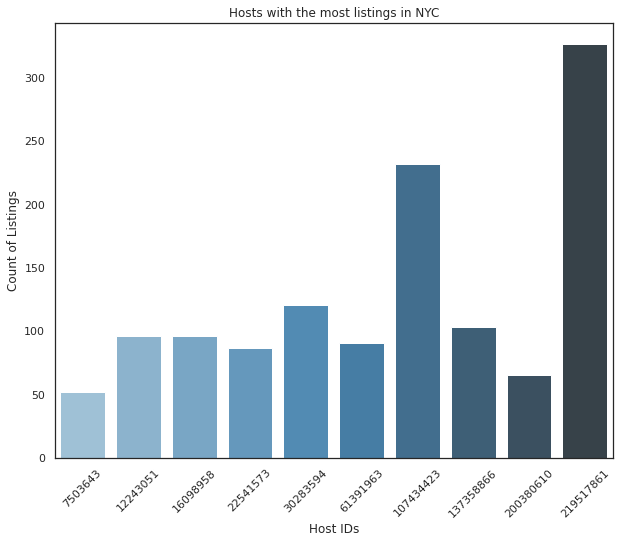

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
vs_1=sns.barplot(x="Host_ID", y="Listings", data=top_host,
                 palette='Blues_d')
vs_1.set_title('Hosts with the most listings in NYC')
vs_1.set_ylabel('Count of Listings')
vs_1.set_xlabel('Host IDs')
vs_1.set_xticklabels(vs_1.get_xticklabels(), rotation=45)

**Observation**

Now, we can see that there is a good distribution between top 10 hosts with the most listings. '219517861' host has more than 300+ listings.
And '7503643' has the lowest listing among them

In [6]:
# Let's check the prices in every neighbourhood group('Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx')

# Brooklyn
p1 = df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_p1 = p1[['price']]
# Manhattan
p2 = df.loc[df['neighbourhood_group'] == 'Manhattan']
price_nei2 = p2[['price']]
# Queens
p3 = df.loc[df['neighbourhood_group'] == 'Queens']
price_p3 = p3[['price']]
# Staten Island
p4 = df.loc[df['neighbourhood_group'] == 'Staten Island']
price_p4 = p4[['price']]
# Bronx
p5 = df.loc[df['neighbourhood_group'] == 'Bronx']
price_p5 = p5[['price']]

list_of_price = [price_p1, price_nei2, price_p3, price_p4, price_p5]


In [7]:
price_stats = []
neigh_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# now let's check the price statistics for every neighbourhood

for x in list_of_price:
    i = x.describe(percentiles=[.25, .5, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    price_stats.append(i)

price_stats[0].rename(columns={'price': neigh_list[0]}, inplace=True)
price_stats[1].rename(columns={'price': neigh_list[1]}, inplace=True)
price_stats[2].rename(columns={'price': neigh_list[2]}, inplace=True)
price_stats[3].rename(columns={'price': neigh_list[3]}, inplace=True)
price_stats[4].rename(columns={'price': neigh_list[4]}, inplace=True)

# final view of dataframe

final_df = price_stats
final_df = [df.set_index('Stats') for df in final_df]
final_df=final_df[0].join(final_df[1:])
final_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

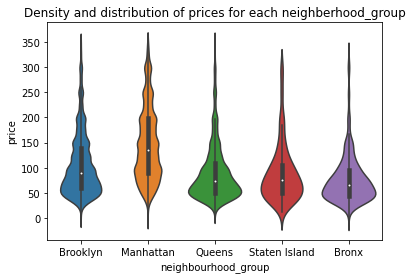

In [8]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 350]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

In [29]:
# average price, availability in year 

avg_price = pd.DataFrame(df[['price', 'availability_365']].describe())
avg_price.columns=['Price', 'Availability in a year']
avg_price

,Price,Availability in a year
count,48895.000000,48895.000000
mean,152.720687,112.781327
std,240.154170,131.622289
min,0.000000,0.000000
25%,69.000000,0.000000
50%,106.000000,45.000000
75%,175.000000,227.000000
max,10000.000000,365.000000


In [10]:
df1 = df['neighbourhood_group'].value_counts()

Text(0.5, 0, 'Neighbourhood_group')

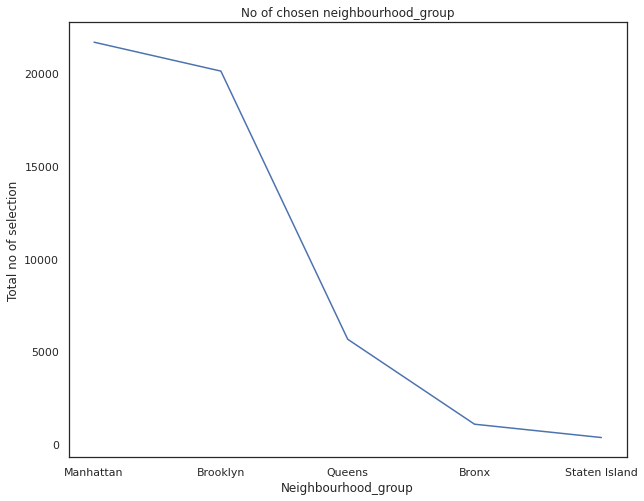

In [11]:
plt.plot(df1)
plt.title('No of chosen neighbourhood_group')
plt.ylabel('Total no of selection')
plt.xlabel('Neighbourhood_group')

**Let's visualise neighbourhood group through pie chart.**

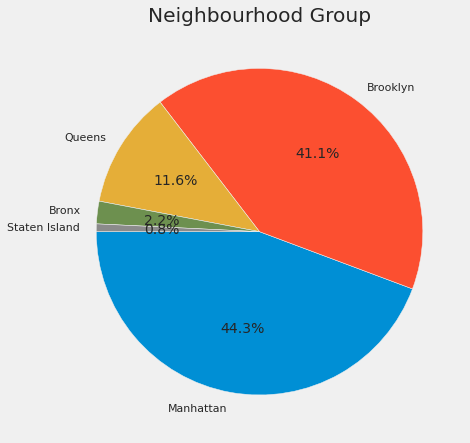

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.

In [30]:
# the most reviewed hosts per month

df2 = pd.DataFrame(df.groupby('reviews_per_month').sum()['host_id'])
rv = (df2.sort_values('reviews_per_month',ascending=False))
rv.columns = ['Host ID']
rv['Reviews per month'] = rv.index
rv.reset_index(drop=True, inplace=True)
rv

,Host ID,Reviews per month
0,244361589,58.50
1,244361589,27.95
2,228415932,20.94
3,156684502,19.75
4,156684502,17.82
...,...,...
932,33438486302,0.05
933,19063643696,0.04
934,23450102638,0.03
935,19323462025,0.02


In [31]:
#let's check 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


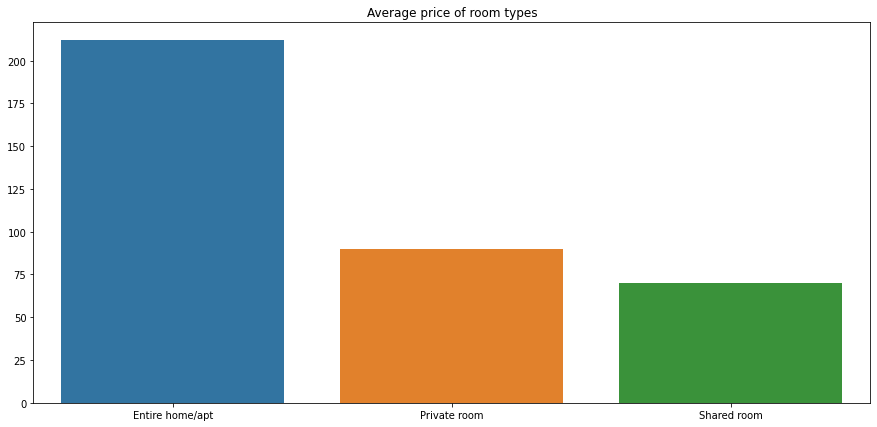

In [11]:
d = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(15,7))
sns.barplot(d.index.tolist(), d.values, ax=ax)
ax.set_title('Average price of room types')
fig.show()

There are three types of rooms

Namely:

1.Private room

2.Entire home/apt room_type

3.Shared room.

4.People mostly prefered to take whole apartment on rent followed by Private room.

5.very few people prefered to have shared rooms.

We will try to catogorise the 'price'like cheep,affordable and expensive and then analyse the 'price' for 'room_type' as per it.

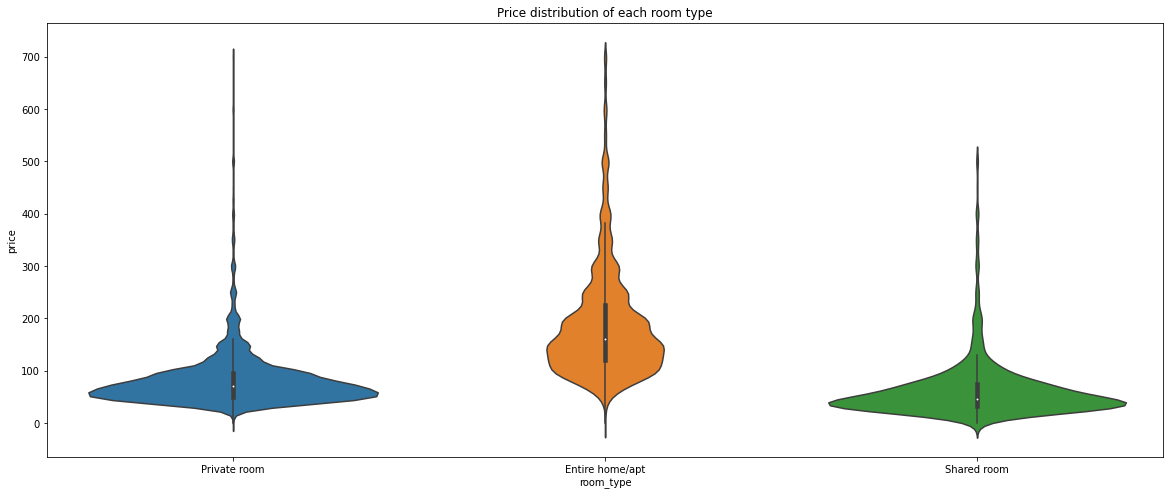

In [13]:
fig, ax= plt.subplots(figsize=(20,8))
sns.violinplot(x="room_type", y="price", data=df[df['price'] <= 700], ax=ax)
ax.set_title('Price distribution of each room type')
fig.show()

Above graphs is for analysing the average cost of stay in different room types.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


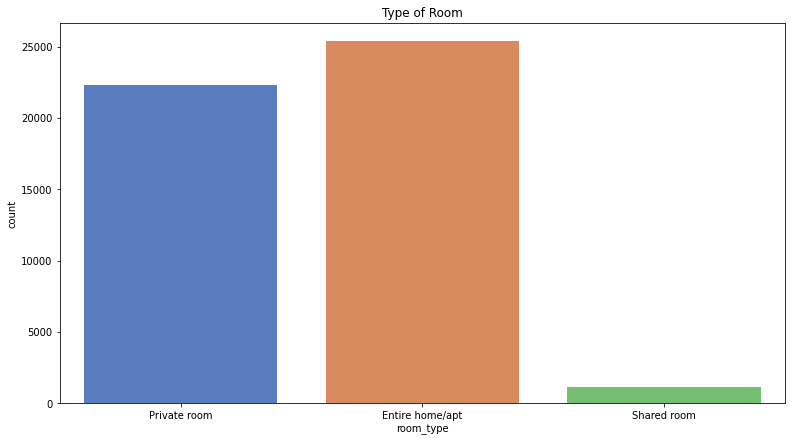

In [10]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

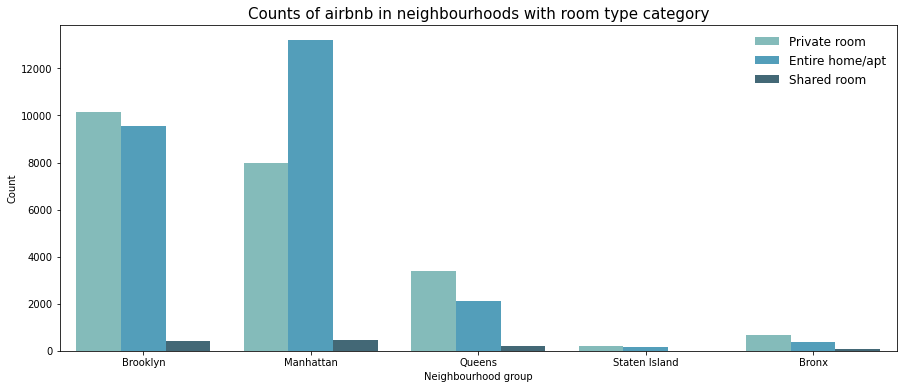

In [13]:
# Neighbourhood groups with counts with category room_type

plt.figure(figsize=(15,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

<Figure size 1080x432 with 0 Axes>

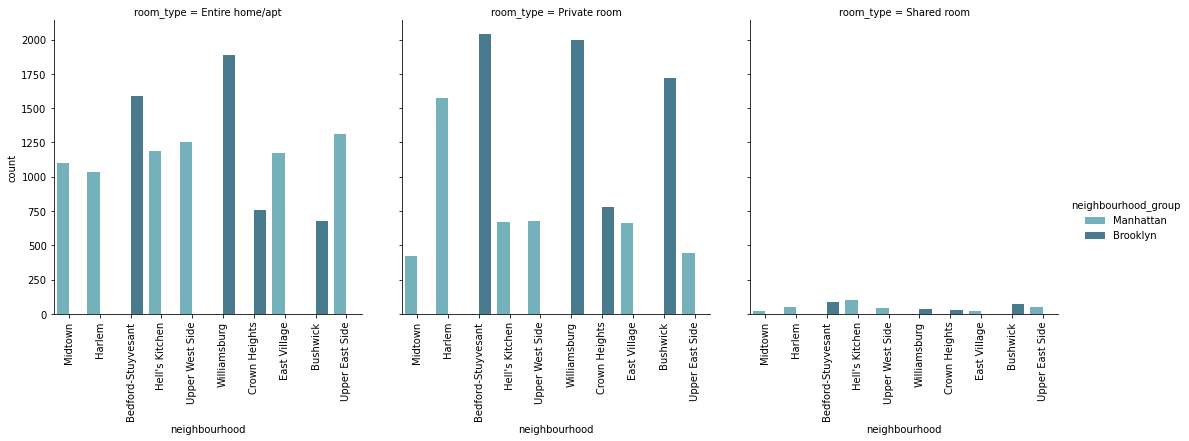

In [22]:
# Visualisation 3 - top neighbourhoods with category of room type

top_neigh = df['neighbourhood'].value_counts().reset_index().head(10)
top_neigh = top_neigh['index'].tolist()

plt.figure(figsize=(15,6))
vis = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=df.loc[df['neighbourhood'].isin(top_neigh)], kind='count', palette='GnBu_d')
vis.set_xticklabels(rotation=90)

Amazing, but let' breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with an interesting output, we can easily proceed with comparing distributions among interesting attributes. 

x and y axes stay exactly the same for each subplot, X-axis observations we want to count and Y-axis represents a count of observations. However, there are 2 more important elements: hue and column; those 2 differentiate subplots. 
After we specify the column and determined hue we are able to observe and compare our x and y axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods.

Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

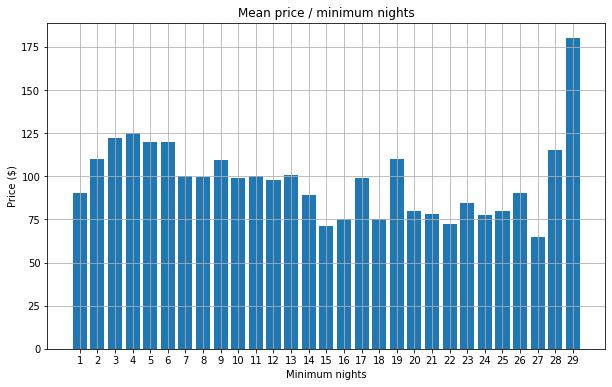

In [6]:
d = df[df['minimum_nights'] < 30].groupby('minimum_nights')['price'].median()
fig = plt.figure(figsize=(10,6))
plt.xticks(np.arange(min(d.keys().tolist()), max(d.keys().tolist())+1, 1.0))
plt.bar(d.keys().tolist(), d.tolist())
plt.title('Mean price / minimum nights')
plt.xlabel('Minimum nights')
plt.ylabel('Price ($)')
plt.grid(True)

1.It's generally cheaper to stay in rooms between 14 and 28 nights.​

2.Usually, the minimum required nights to stay in a room is arround 2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

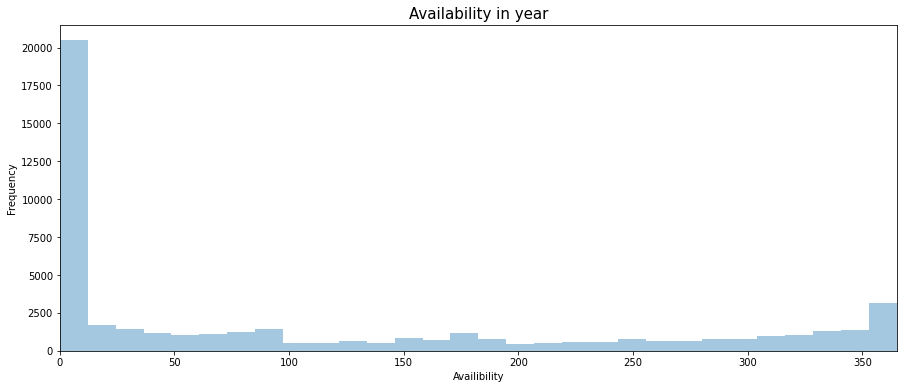

In [6]:
# availability in year

plt.figure(figsize=(15,6))
sns.distplot(df.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")

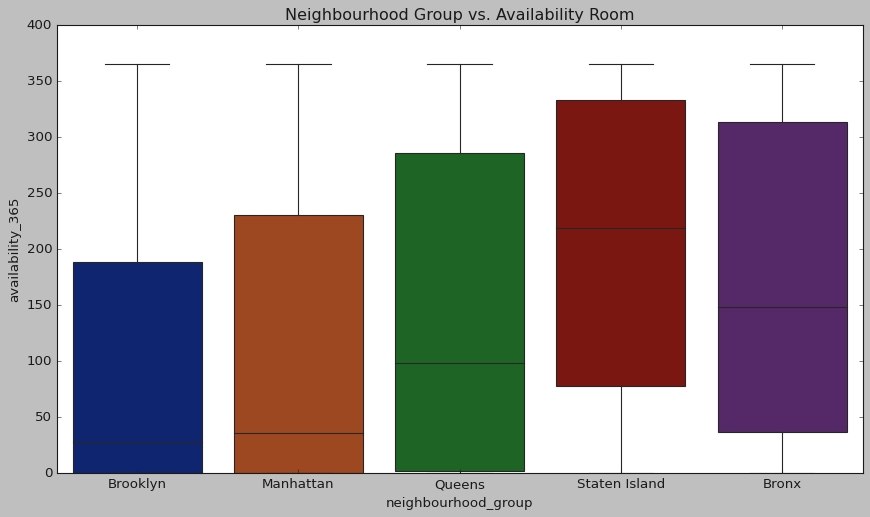

In [15]:
#  Neighbourhood Group vs. Availability Room
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

The graph above shows the relationship between the availability room and neighborhood group.

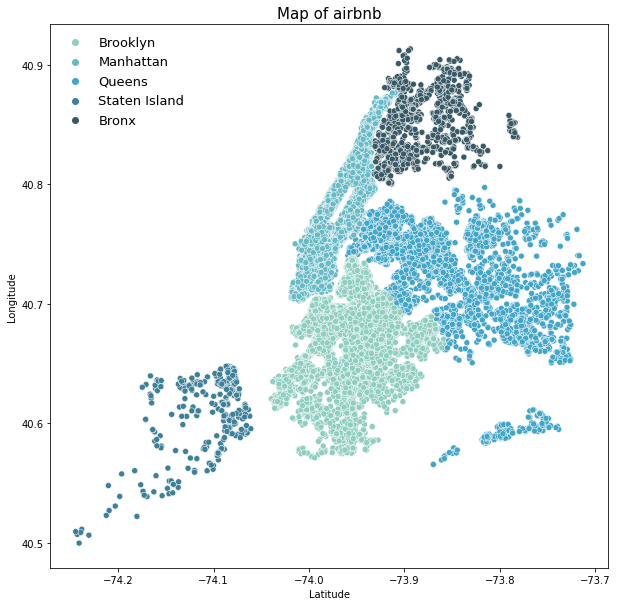

In [16]:
#  map of hosts

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

Good, scatterplot worked just fine to output our latitude and longitude points.

In [ ]:
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


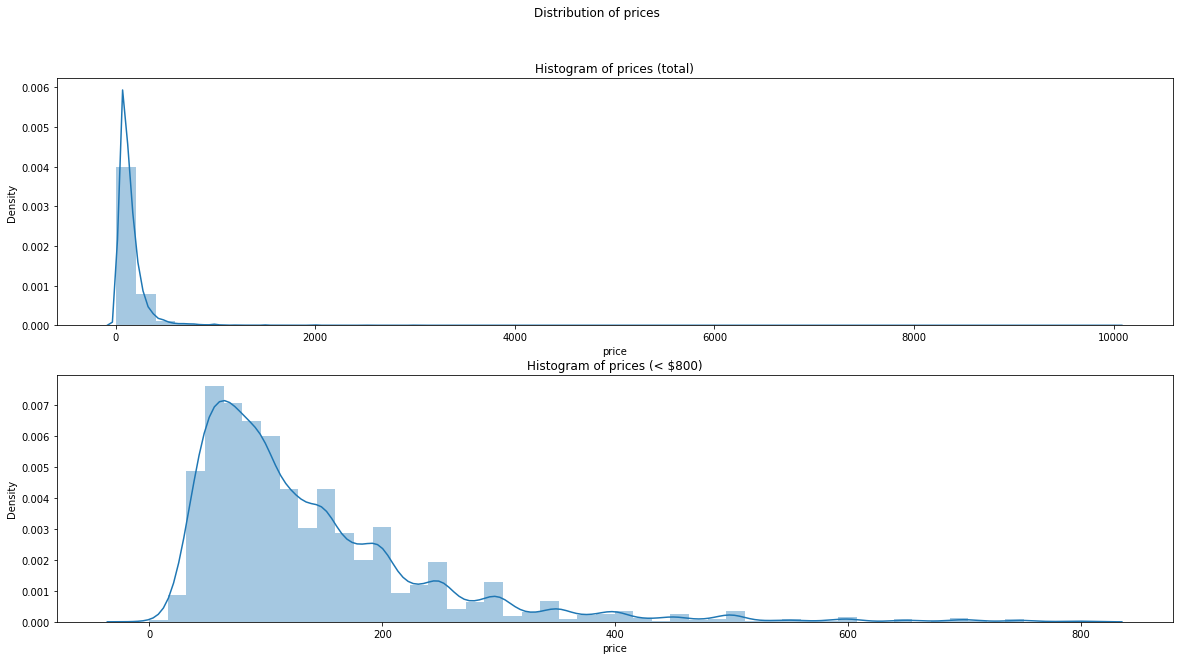

In [ ]:
fig, ax= plt.subplots(2,1,figsize=(20,10))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(df['price'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of prices (< $800)")
sns.distplot(df[df['price'] < 800]['price'], kde=True, ax=ax[1])



fig.suptitle("Distribution of prices")
fig.show()

In [ ]:
d=df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(d.index.tolist(), d.values, ax=ax[0])
ax[0].set_title('Mean price of each neighbourhood_group')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


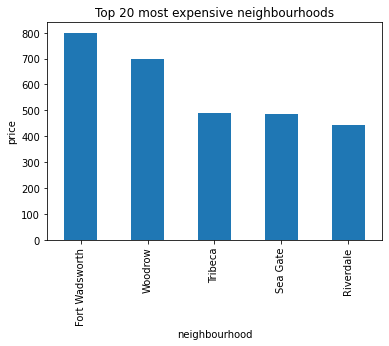

In [ ]:
d.plot(kind='bar', title='Top 20 most expensive neighbourhoods', ylabel='Price',
         xlabel='Neighbourhood')
plt.show()

**Conclusion**

That's it! We reached the end of our exercise.


This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical map to show the number of hosts. Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. Therefore, I hope this kernel helps everyone!